In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

KERNEL_SIZE = 11

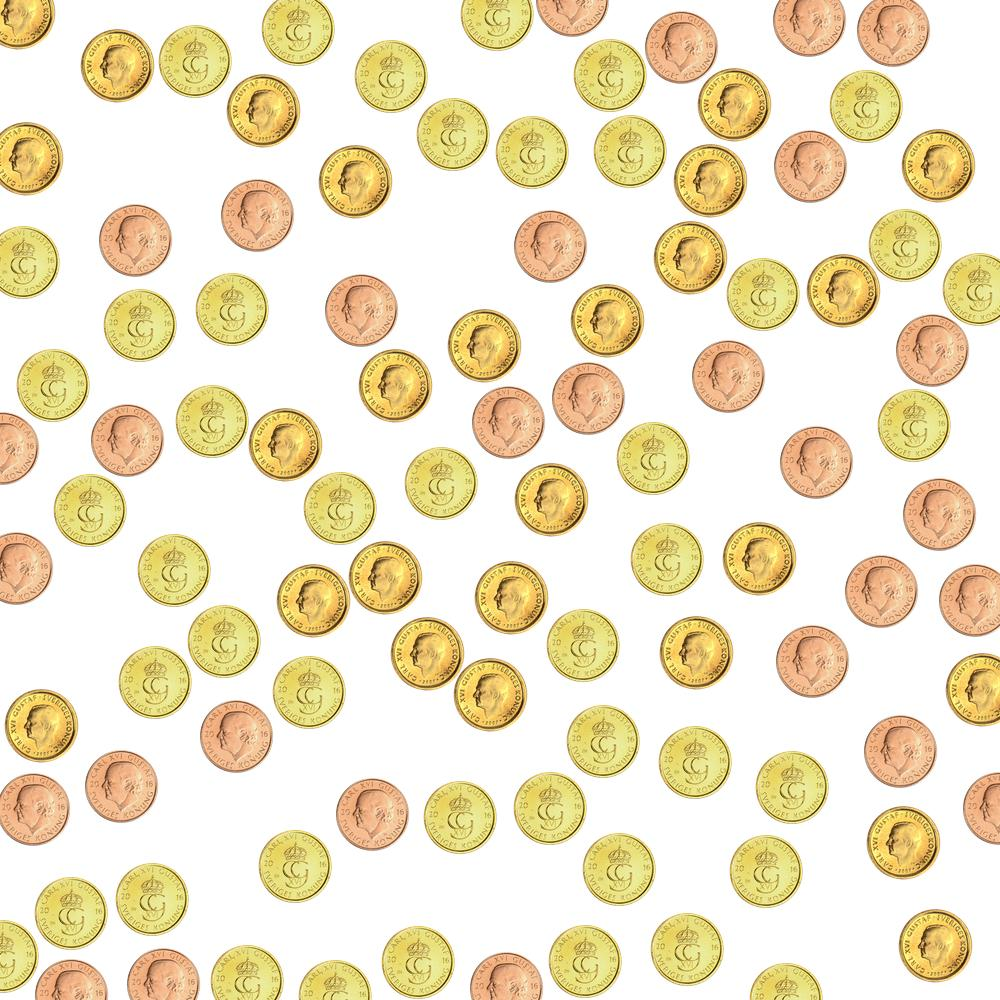

In [2]:
img = cv2.imread('4.png')
cv2_imshow(img)

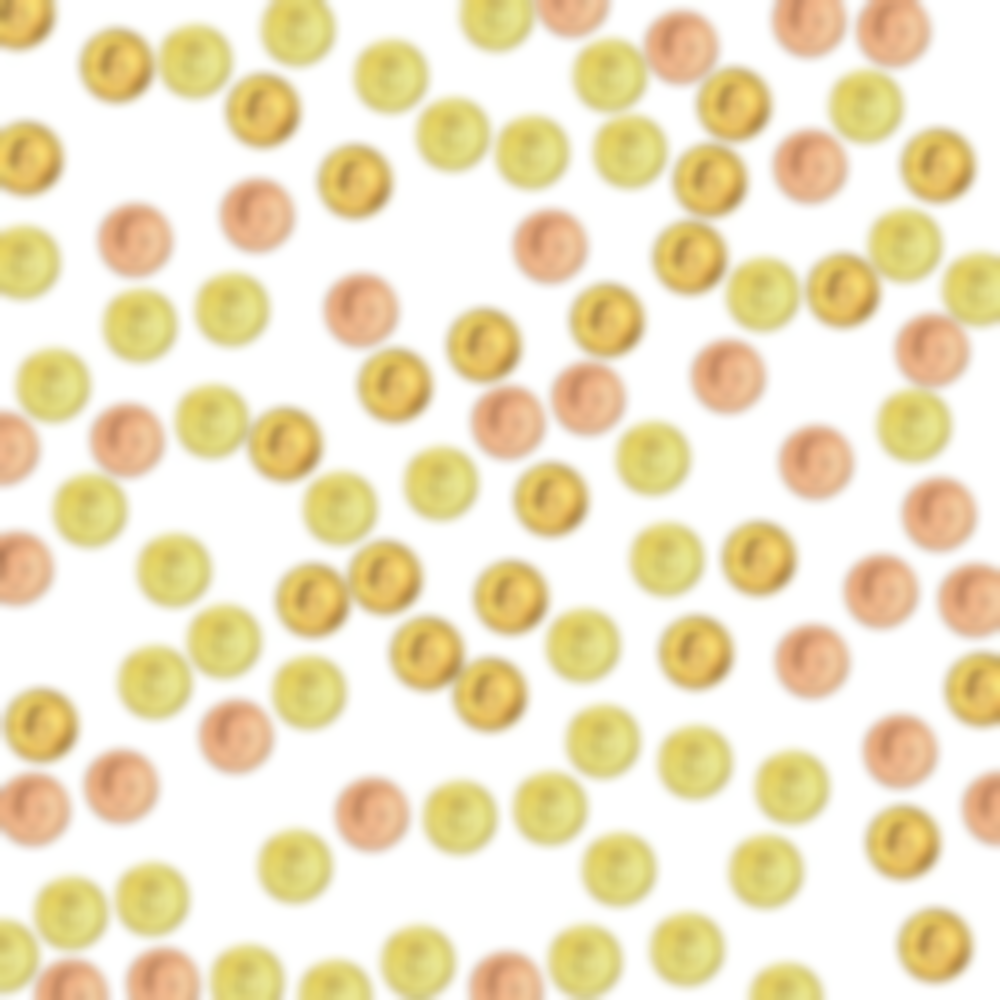

In [3]:
kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32)/KERNEL_SIZE**2
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(cv2.filter2D(img, -1, kernel))

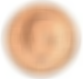

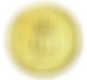

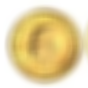

In [4]:
sek1, sek5, sek10 = img[176:255, 216:299], img[285:365, 96:183], img[20:108, 72:160]
cv2_imshow(sek1)
cv2_imshow(sek5)
cv2_imshow(sek10)

In [5]:
CUT = 600
cols_sek1 = {(int(r), int(g), int(b)) for i in sek1 for r,g,b in i if int(r)+int(g)+int(b)<CUT}
cols_sek5 = {(int(r), int(g), int(b)) for i in sek5 for r,g,b in i if int(r)+int(g)+int(b)<CUT}
cols_sek10 = {(int(r), int(g), int(b)) for i in sek10 for r,g,b in i if int(r)+int(g)+int(b)<CUT}

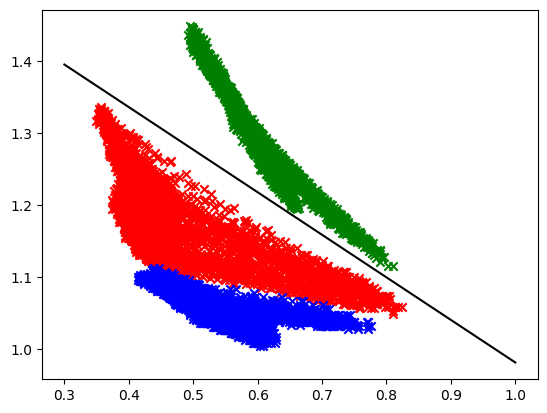

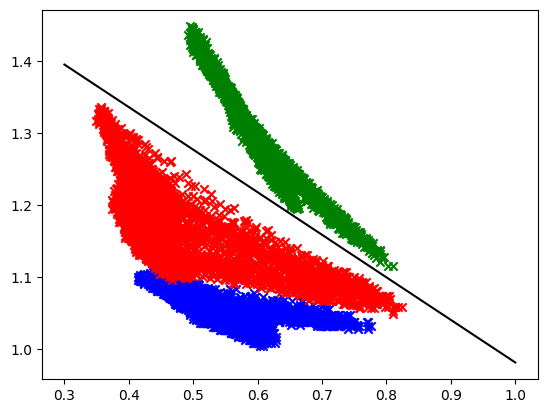

In [6]:
import matplotlib.pyplot as plt
for d in [-1, 1]:
    fig = plt.figure()
    ax = fig.add_subplot()
    for cols, c in [(cols_sek5, 'blue'), (cols_sek10, 'red'), (cols_sek1, 'green')][::d]:
        cols = sorted(cols)
        xs = [i[0]/i[2] for i in cols]
        ys = [i[2]/i[1] for i in cols]
        ax.scatter(xs, ys, marker='x', color=c)
    ax.plot([0.3, 1], [1.395, 0.982], c='black') # -0.59x+1.572
    plt.show()

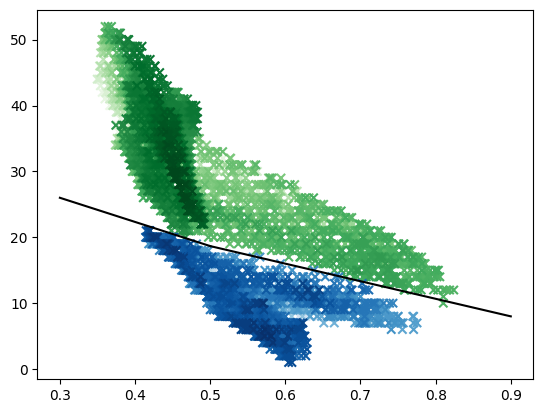

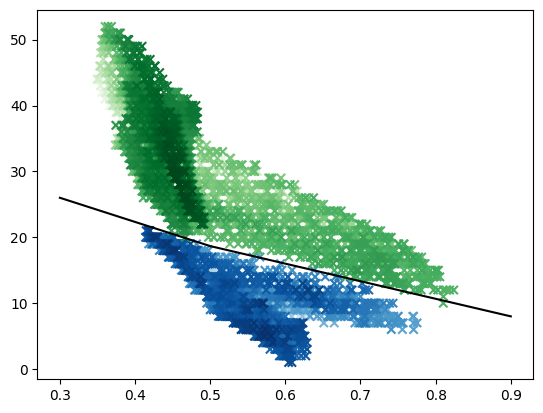

In [7]:
import matplotlib.pyplot as plt
for d in [-1, 1]:
    fig = plt.figure()
    ax = fig.add_subplot()
    for cols, c in [(cols_sek5, 'Blues'), (cols_sek10, 'Greens')][::d]:
        cols = sorted(cols)
        xs = [i[0]/i[2] for i in cols]
        ys = [(i[2]-i[1]) for i in cols]
        ax.scatter(xs, ys, marker='x', c=[i[2] for i in cols], cmap=c)
    ax.plot([0.3, 0.5], [26, 56/3], c='black') # -110x/3+37
    ax.plot([0.5, 0.9], [56/3, 8], c='black') # -80x/3+32
    plt.show()